# Modèle d'identification des SMS Spam basé sur la régression logistique:

#### 1- set up the environment:

In [38]:
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
print("Set up completed .")

Set up completed .


#### 2- load the data :

In [23]:
df = pd.read_csv("./sms-spam-dataset.txt",sep="\t")

<Axes: xlabel='classe', ylabel='Count'>

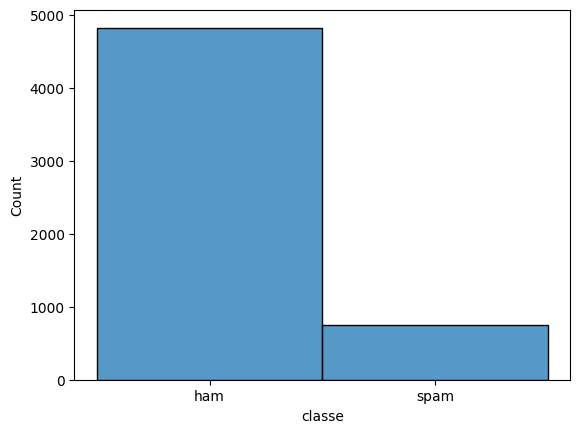

In [24]:
sns.histplot(data=df.classe)

#### 3- preprocessing the data:

In [26]:
nlp = spacy.load("en_core_web_sm")

In [31]:
def preprocessing(text: str) -> str:
    doc = nlp(text.lower())
    tokens = [ word.lemma_ for word in doc if not (word.is_stop or word.is_punct)]
    return ' '.join(tokens)

In [33]:
df["processed_text"] = df.message.apply(lambda text:preprocessing(text))

In [34]:
df.head()

,classe,message,processed_text
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis n great wor...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun early hor u c
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf live


In [35]:
X = df['processed_text']
y = df["classe"]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [41]:
X_train.shape

(4457,)

In [42]:
X_test.shape

(1115,)

In [43]:
cv = CountVectorizer()
X_train = cv.fit_transform(X_train)

In [45]:
X_train.shape

(4457, 6691)

#### 4- train the model:

In [46]:
model_classefier = MultinomialNB()

In [47]:
model_classefier.fit(X_train,  y_train)

MultinomialNB()

In [48]:
X_test = cv.transform(X_test)
y_pred = model_classefier.predict(X_test)

In [50]:
f1_score(y_pred,y_test,average="micro")

0.9874439461883409